In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn import linear_model, model_selection, metrics, svm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [2]:
filteredDF = pd.read_csv("filteredDF.csv", decimal=".", delimiter=",")
#shape 6805 lignes et 38 colonnes
filteredDF.columns

Index(['Unnamed: 0', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'totalKbtu', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'City', 'State', 'Location',
       'PrimaryPropertyType', 'PropertyGFAParking', 'Neighborhood',
       'NeighborhoodInt', 'BuildingType', 'PrimaryPropertyTypeInt',
       'BuildingTypeInt', 'ENERGYSTARScoreColor', 'TotalGHGEmissions'],
      dtype='object')

In [3]:
np.unique(filteredDF["GHGEmissionsIntensity(kgCO2e/ft2)"])

array([0.  , 0.01, 0.02, ...,  nan,  nan,  nan])

In [4]:
#filteredDF["PropertyGFAParking"]  = filteredDF["PropertyGFAParking"].astype(str)
filteredDF["PrimaryPropertyType"]  = filteredDF["PrimaryPropertyType"].astype(str)
#filteredDF["ListOfAllPropertyUseTypes"] = filteredDF["ListOfAllPropertyUseTypes"].astype(str)
#filteredDF["PropertyGFAParking"] = filteredDF["PropertyGFAParking"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "autre")
filteredDF.shape

(6716, 31)

<AxesSubplot:>

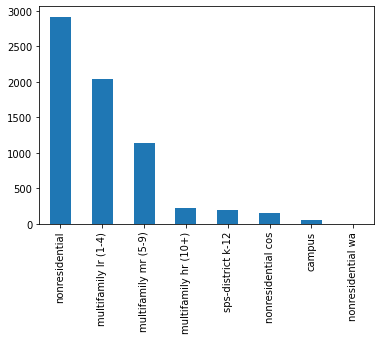

In [5]:
filteredDF["PrimaryPropertyType"]  = filteredDF["PrimaryPropertyType"].astype(str)
filteredDF["BuildingType"].value_counts().plot(kind='bar')

In [6]:
a = filteredDF["PrimaryPropertyType"].value_counts().to_frame()
a = a[a["PrimaryPropertyType"] > 1]
print(sum(a.values))
a
# faible nombre d'instances eventuellement à oublier. 

[6716]


,PrimaryPropertyType
low-rise multifamily,1985
mid-rise multifamily,1103
small- and mid-sized office,590
other,514
large office,344
k-12 school,275
mixed use property,259
high-rise multifamily,208
retail store,191
warehouse,187


Traitement de PrimaryPropertyType and Neighborhood

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a 

<AxesSubplot:>

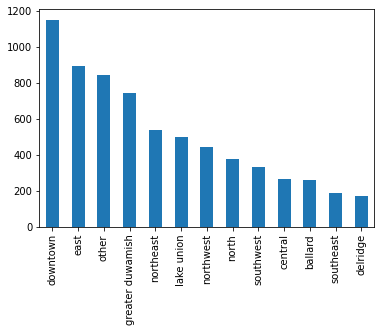

In [7]:
filteredDF2 = filteredDF
for column in filteredDF.columns:
    #print(column, str(filteredDF[column].dtype))
    if str(filteredDF[column].dtype) == "object" and column in ["PrimaryPropertyType", "City", "State", "Neighborhood"]: #"Location", "Neighborhood", "PropertyGFAParking", 
        a = filteredDF[column].value_counts().to_frame()
        a = a[a[column] > 1]
        #print(column, list(a.index.values))
        
        #filteredDF2 = filteredDF2[filteredDF2[column].isin(list(a.index.values))]
        filteredDF2[column].loc[filteredDF2[column].str.len() > 20] = "other"
        #filteredDF2[column].loc[filteredDF2[column].str.isnumeric()] = "other"
        
        filteredDF2[column] = filteredDF2[column].str.strip()
        filteredDF2[column] = filteredDF2[column].str.lower()
        filteredDF2[column] = filteredDF2[column].str.replace('"', '')
filteredDF2['Neighborhood'].value_counts().plot(kind="bar")
#filteredDF2['Location'].value_counts().plot(kind="bar")
#filteredDF2['PropertyGFAParking'].value_counts().plot(kind="bar")
#filteredDF2['Neighborhood'].loc[filteredDF2['Neighborhood'].str.len() > 20] = "other"
#filteredDF2['Neighborhood'].loc[filteredDF2['Neighborhood'].str.isnumeric()] = "other"
#filteredDF2['Neighborhood'].value_counts()

Traitement de Location

In [8]:
#filteredDF2['Location'].value_counts()
#filteredDF2['Location'].loc[filteredDF2['Location'].str.len() > 20] = "other"
#filteredDF2['Location'].value_counts()
filteredDF2.shape

(6716, 31)

In [9]:
#Traitement de PropertyGFAParking
#filteredDF2['PropertyGFAParking'].value_counts().to_frame()
#filteredDF2['PropertyGFAParking'].loc[filteredDF2['PropertyGFAParking'].str.isnumeric()] = "other"
#filteredDF2['PropertyGFAParking'].loc[filteredDF2['PropertyGFAParking'].str.len() > 30] = "other"
#filteredDF2['PropertyGFAParking'] = filteredDF2['PropertyGFAParking'].replace("nan", "other")
#filteredDF2['PropertyGFAParking'].value_counts().to_frame()

In [10]:
nonNullRateFrame = pd.read_csv("nonNullFrame.csv", decimal=".", delimiter=",")
nonNullRateFrame

,Unnamed: 0,columns,type,filledRatio,nbValues
0,0,OSEBuildingID,int64,100.000,3432
1,1,DataYear,int64,100.000,2
2,2,BuildingType,object,100.000,8
3,3,PrimaryPropertyType,object,100.000,29
4,4,PropertyName,object,100.000,6527
...,...,...,...,...,...
56,56,NeighborhoodInt,int64,100.000,13
57,57,BuildingTypeInt,int64,100.000,8
58,58,ENERGYSTARScoreColor,object,100.000,4
59,59,PrimaryPropertyTypeInt,int64,100.000,29


Traitement de YearBuilt et BuildingTypeInt et transformation de ces variables en numerics

In [11]:
#filteredDF2["YearBuilt"] = pd.to_numeric(filteredDF2["YearBuilt"], errors='coerce')
#filteredDF2["BuildingTypeInt"] = pd.to_numeric(filteredDF2["BuildingTypeInt"], errors='coerce')
np.unique(filteredDF2["BuildingTypeInt"].values)
filteredDF2["YearBuilt"].value_counts()

2000    144
2008    135
1989    134
1999    129
1988    128
       ... 
1942      6
1944      4
1939      4
1936      2
1935      2
Name: YearBuilt, Length: 113, dtype: int64

In [12]:
# number of floors 
#filteredDF2['NumberofFloors'] = filteredDF2['NumberofFloors'].replace(np.nan, 0)
#filteredDF2 = filteredDF2[filteredDF2['GHGEmissions(MetricTonsCO2e)'] > -1000]
#filteredDF2['NumberofFloors'].value_counts()

In [14]:
# Energy Variables
#for y let's keep only rows with data
#filteredDF2['GHGEmissions(MetricTonsCO2e)'] = filteredDF2['GHGEmissions(MetricTonsCO2e)'].replace(np.nan, -1000)
#filteredDF2 = filteredDF2[filteredDF2['GHGEmissions(MetricTonsCO2e)'] > 0]

filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'] = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'] > -1000]
filteredDF2['LargestPropertyUseTypeGFA'] = filteredDF2['LargestPropertyUseTypeGFA'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['LargestPropertyUseTypeGFA'] > -1000]
filteredDF2['PropertyGFATotal'] = filteredDF2['PropertyGFATotal'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['PropertyGFATotal'] > -1000]
#filteredDF2['YearBuilt'] = filteredDF2['YearBuilt'].replace(np.nan, -1000)
#print(np.unique(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values))
#nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
noEnergyList = []

toTrash = ['Unnamed: 0', 
           #"ListOfAllPropertyUseTypes", 
           "Location", 
           "State", 
           "ThirdLargestPropertyUseType", 
           "PropertyGFAParking", 
           "Neighborhood", 
           "PrimaryPropertyType", 
           "NaturalGas(therms)", 
           "YearsENERGYSTARCertified", 
           "ENERGYSTARScore", 
           "ENERGYSTARScoreColor", 
           "TotalGHGEmissions", 
           "City", 
           #"YearBuilt", 
           "Address", 
           "GHGEmissionsIntensity"]
toTrash = toTrash + [
        'NumberofBuildings', 
       'PropertyGFABuilding(s)', 
        'LargestPropertyUseType', 
        "LargestPropertyUseTypeGFA",
        #"PropertyGFATotal", 
        "BuildingType", 
        "totalKbtu", 
       "NumberofFloors", 
       'ThirdLargestPropertyUseTypeGFA']


for column in filteredDF2.columns:
    if column not in listToChange and column not in toTrash:
        noEnergyList.append(column)

print("noEnergyList", noEnergyList)
#print("frameShape", filteredDF2.shape)

noEnergyList ['YearBuilt', 'PropertyGFATotal', 'NeighborhoodInt', 'PrimaryPropertyTypeInt', 'BuildingTypeInt']


<ipython-input-14-712631b2998d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF2['LargestPropertyUseTypeGFA'] = filteredDF2['LargestPropertyUseTypeGFA'].replace(np.nan, -1000)


# Linear Regression CO2 Metrics 

In [15]:
#Linear Regression CO2 Metrics 
y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1)
#LabelEncoder make a multiclass value
#y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=noEnergyList)

#X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, train_size=0.8)

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.1489020053331087


# avec une standardisation des données

In [16]:
y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1))
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
#y = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1)
#LabelEncoder make a multiclass value
#y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=noEnergyList)

X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y_std, train_size=0.7)
y_std

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.2629513744550015


In [17]:
#filteredDF = filteredDF[filteredDF["GHGEmissionsIntensity"] > 0]
filteredDF["GHGEmissions(MetricTonsCO2e)"].values

array([ 2.49430e+02,  2.63510e+02,  2.06148e+03, ..., -1.00000e+00,
       -1.00000e+00, -1.00000e+00])

# With label encoder for "Neighborhood PrimaryPropertyType BuildingType"

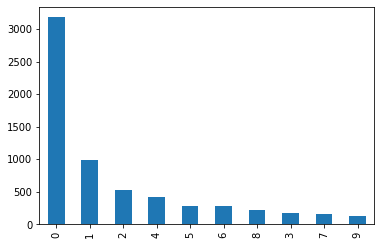

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
for column in ["Neighborhood", "PrimaryPropertyType", "BuildingType", "LargestPropertyUseType","Location", "PropertyGFAParking", "NumberofFloors", "NumberofBuildings"]:
    newCol = column+"Enc"
    filteredDF2[newCol] = encoder.fit_transform(filteredDF2[column].values)
    filteredDF2[newCol].value_counts().plot(kind="bar")
#filteredDF2["BuildingTypeEnc"].value_counts().plot(kind="bar")


# Label Encoder + Std 

In [19]:
#Label Encoder + Std 
columnsEncodedToKeep = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc']
#y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1))

#GHGEmissionsIntensity(kgCO2e/ft2)
stdScaler = StandardScaler()
X = filteredDF2.filter(items=columnsEncodedToKeep)

X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y_std, train_size=0.7)

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.3224962626811029


# Avec Grid Search 


In [20]:
lrCV = linear_model.LinearRegression()
params = {"fit_intercept": ["True", "False"], "normalize": ["True", "False"] } 
rmseLinearRegression = []
scoreLinearRegression = []
Y_pred = []
for cv in range(2, 20):
    lr_gs = GridSearchCV(lrCV, params, cv=cv)
    #print(lrCV.get_params().keys())
    lr_gs.fit(X_train, y_train)
    #print(cv, lr_gs.best_params_)
    #print(cv, lr_gs.best_score_)
    Y_pred.append(lr_gs.predict(X_test))
    scoreLinearRegression.append(lr_gs.best_score_)
    rmseLinearRegression.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred[-1])))
    print(cv, lr_gs.best_score_, rmseLinearRegression[-1])

2 0.16645405334036645 0.9285675925811158
3 0.14893400390702613 0.9285675925811158
4 0.1936554452315076 0.9285675925811158
5 0.1531680191143051 0.9285675925811158
6 0.08081356999563923 0.9285675925811158
7 0.1198291788474076 0.9285675925811158
8 0.045196448530687994 0.9285675925811158
9 0.1506506832873496 0.9285675925811158
10 0.12497022984085375 0.9285675925811158
11 0.09586470075582078 0.9285675925811158
12 0.007618232457158425 0.9285675925811158
13 0.060148038621877425 0.9285675925811158
14 0.06058582851204357 0.9285675925811158
15 0.07439110384023725 0.9285675925811158
16 -0.13688630972083415 0.9285675925811158
17 -0.0964136894450525 0.9285675925811158
18 -0.028381502354762563 0.9285675925811158
19 -0.11181017492948808 0.9285675925811158


# Regression ridge 

In [21]:
# paramètre de regularisation 
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
errors = []
Y_pred_reg_ridge = []
rmse_reg_ridge = []
score_reg_ridge = []

params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}
for cv in range(2, 20):
    ridgeCV = GridSearchCV(linear_model.Ridge(), params, cv=cv)
#print(linear_model.Ridge().get_params())
    ridgeCV.fit(X_train, y_train)
    #print(cv, ridgeCV.best_score_)
    score_reg_ridge.append(ridgeCV.best_score_)
    Y_pred_reg_ridge.append(ridgeCV.predict(X_test))
    rmse_reg_ridge.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_reg_ridge[-1])))
    print(cv, ridgeCV.best_score_, rmse_reg_ridge[-1])

2 0.2098977879759018 0.9670699040076011
3 0.21425158780949868 0.9752294175998707
4 0.23076485670945157 0.9598809150752453
5 0.22909064903763615 0.9752294175998707
6 0.2137923415336287 0.9940316433981227
7 0.22939219357130142 0.9842642518089028
8 0.22060868558115818 0.9940316433981227
9 0.24379336094296722 0.9752294175998707
10 0.24808266664781375 0.9842642518089028
11 0.2403934944203945 0.9940316433981227
12 0.21902734000529542 1.0043553751927015
13 0.24243545897990496 0.9940316433981227
14 0.22541707800634356 0.9940316433981227
15 0.24596334084534852 0.9940316433981227
16 0.22195596817253038 1.0150406160556975
17 0.20946910568437516 1.0150406160556975
18 0.2508812166898703 1.0043553751927015
19 0.22593200720830212 1.0150406160556975


In [22]:
ridgeCV.best_score_

0.22593200720830212

# Lasso

In [23]:
lasso = linear_model.Lasso(max_iter=10000)
params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}
Y_pred_lasso = []
rmselasso  = []
scoreLasso  = []
for cv in range(2, 20):
    lassoGS = GridSearchCV(lasso, params, cv=cv)
    lassoGS.fit(X_train, y_train)
    scoreLasso.append(lassoGS.best_score_)
    Y_pred_lasso.append(lassoGS.predict(X_test))
    rmselasso.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_lasso[-1])))
    print(cv, lassoGS.best_score_, rmselasso[-1])

2 0.21915183115097536 0.9747326019939191
3 0.1999031766889375 0.9683737738769693
4 0.2289637320751953 0.9538487402525504
5 0.2201764291164865 0.9683737738769693
6 0.20181019027886973 0.9970746452299882
7 0.2144369650708411 0.9970746452299882
8 0.20653436681624332 0.9970746452299882
9 0.2318248365389984 0.9838573826579989
10 0.23357905430299475 0.9970746452299882
11 0.23047358329191264 0.9970746452299882
12 0.2086231317228431 1.0163552229113937
13 0.23145784207300205 0.9970746452299882
14 0.21305589221721008 0.9970746452299882
15 0.23325966143694535 0.9970746452299882
16 0.2127044089988745 1.0163552229113937
17 0.20343339219563394 1.0163552229113937
18 0.2417713211863201 0.9970746452299882
19 0.2182426948729093 1.0163552229113937


# KernelRidge

In [ ]:
params = {"gamma": np.logspace(-5, 5, 10), "alpha": np.logspace(-5, 5, 10), "kernel": ["rbf", "linear"]}
rmse_kernel_ridge = []
score_kernel_ridge = []
Y_pred_kernel_ridge = []
for cv in range(2, 10):
    kernelRidgeCV = model_selection.GridSearchCV(KernelRidge(), params, cv=cv, scoring="neg_mean_squared_error")
    kernelRidgeCV.fit(X_train, y_train)
    Y_pred_kernel_ridge.append(kernelRidgeCV.predict(X_test))
    score_kernel_ridge.append(kernelRidgeCV.best_score_)
    rmse_kernel_ridge.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_kernel_ridge[-1])))
    print(cv, kernelRidgeCV.best_score_, kernelRidgeCV.best_params_ , rmse_kernel_ridge[-1])

2 -0.615885122274821 {'alpha': 0.0001291549665014884, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 0.7878177428153321
3 -0.47129742027822014 {'alpha': 0.0001291549665014884, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 0.7878177428153321
4 -0.48185396803104585 {'alpha': 0.0001291549665014884, 'gamma': 0.0016681005372000592, 'kernel': 'rbf'} 0.7878177428153321


# SVM

In [ ]:
SVR = svm.SVR()
parameters = {"C": np.logspace(-5, 5, 10), "kernel": ["linear", "poly", "rbf", "sigmoid"]}
rmseLinearSVR = []
scoreLinearSVR = []
Y_pred_svm = []

for cv in range(2, 8):
    lr_svm = GridSearchCV(SVR, parameters, cv=cv)
    lr_svm.fit(MinMaxScaler().fit_transform(X_train), y_train.ravel())
    Y_pred_svm.append(lr_svm.predict(MinMaxScaler().fit_transform(X_test)))
    scoreLinearSVR.append(lr_svm.best_score_)
    rmseLinearSVR.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_svm[-1])))
    print(cv, lr_svm.best_score_, lr_svm.best_params_ , rmseLinearSVR[-1])

# Multilayer Percpetron 

In [ ]:
params_grid = {"alpha": list(np.logspace(0 ,1, 10)) , "hidden_layer_sizes": list(range(1, 100, 10)), "solver": ["lbfgs", "sgd", "adam"], "activation" : ["identity", "logistic", "tanh", "relu"]}
rmseMultiPercpetron = []
scoreMultiPercpetron = []
Y_pred_MultiPercpetron = []

for cv in range(2, 8):
    perceptCVMLP = GridSearchCV(MLPClassifier(max_iter=1000), params_grid, cv=cv)
    perceptCVMLP.fit(X_trMinMaxScaler().fit_transform(X_train), y_train.ravel())
    Y_pred_MultiPercpetron.append(perceptCVMLP.predict(MinMaxScaler().fit_transform(X_test)))
    scoreMultiPercpetron.append(perceptCVMLP.best_score_)
    rmseMultiPercpetron.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_MultiPercpetron[-1])))

# Graph Y_pred

In [ ]:
print(rmseLinearRegression)

In [ ]:
#A ajouter H2O pour aller à l'essentiel
#print(X_test[:, 1])
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test[:, 1], y_test, color="black", marker='s', label="Test Set")
plt.scatter(X_test[:, 1], Y_pred_lasso[scoreLasso.index(max(scoreLasso))], color="green", marker='o', label="Lasso Pred")
plt.scatter(X_test[:, 1], Y_pred_kernel_ridge[score_kernel_ridge.index(max(score_kernel_ridge))], color="blue", marker='o', label="Kernel Ridge")
plt.scatter(X_test[:, 1], Y_pred_reg_ridge[score_reg_ridge.index(max(score_reg_ridge))], color="yellow", marker='o', label="Ridge Regression")
plt.scatter(X_test[:, 1], Y_pred_svm[scoreLinearSVR.index(max(scoreLinearSVR))], color="lightgreen", marker='o', label="SVM")
plt.scatter(X_test[:, 1], Y_pred[scoreLinearRegression.index(max(scoreLinearRegression))], color="orange", marker='o', label="Linear Regression")
plt.legend(loc="lower right", fontsize=14)
#plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
#plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
#         (gridSearch.best_params_['gamma'], auc_cv))
#Ajout de la diagonale de 0.0 à 1.1
#plt.plot([0,1], [0, 1])
plt.xlabel("GFA")
plt.ylabel("CO2")

# Graph Errors

In [ ]:
fig = plt.figure(figsize=(15, 10))
#np.logspace(-5, 5, 10),
print(rmseLinearSVR)
plt.plot(np.logspace(0, 1, 18), rmseLinearRegression,  color="orange", marker='s', label="Linear Regression RMSE")
plt.plot(np.logspace(0, 1, 8), rmse_kernel_ridge,  color="blue", marker='o', label="Kernel Ridge RMSE")
plt.plot(np.logspace(0, 1, 18), rmse_reg_ridge,  color="yellow", marker='o', label="Ridge Regression RMSE")
plt.plot(np.logspace(0, 1, 18), rmselasso,  color="green", marker='o', label="Lasso RMSE")
plt.plot(np.logspace(0, 1, 6), rmseLinearSVR,  color="lightgreen", marker='o', label="SVM RMSE")

plt.legend(loc="lower right", fontsize=14)
plt.ylabel("RMSE")
plt.xlabel("Coefs Alpha/C")

#  Multilayer Perceptron

In [ ]:
params_grid = {"alpha": list(np.logspace(0, 1, 10)) , "hidden_layer_sizes": list(range(1, 100, 10)), "solver": ["lbfgs", "sgd", "adam"], "activation" : ["identity", "logistic", "tanh", "relu"]}
rmseMultiPercpetron = []
scoreMultiPercpetron = []
Y_pred_MultiPercpetron = []

for cv in range(2, 8):
    perceptCVMLP = GridSearchCV(MLPClassifier(max_iter=1000), params_grid, cv=cv)
    perceptCVMLP.fit(X_trMinMaxScaler().fit_transform(X_train), y_train.ravel())
    Y_pred_MultiPercpetron.append(perceptCVMLP.predict(MinMaxScaler().fit_transform(X_test)))
    scoreMultiPercpetron.append(perceptCVMLP.best_score_)
    rmseMultiPercpetron.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_MultiPercpetron[-1])))

# Modelisation to predict TotalGHGEmissions
TotalGHGEmissions

# Preprocessing and Datasplit

In [ ]:
#Label Encoder + Std 
columnsEncodedToKeep = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc']
#y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
y_std_ghge = StandardScaler().fit_transform(filteredDF2['TotalGHGEmissions'].values.reshape(-1, 1))

#GHGEmissionsIntensity(kgCO2e/ft2)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=columnsEncodedToKeep)

X_std = stdScaler.fit_transform(X.values)
X_train_ghge, X_test_ghge, y_train_ghge, y_test_ghge = model_selection.train_test_split(X_std, y_std_ghge, train_size=0.7)

In [ ]:
lrCV = linear_model.LinearRegression()
params = {"fit_intercept": ["True", "False"], "normalize": ["True", "False"] } 
rmseLinearRegressionGHGE = []
Y_pred_GHGE = []
for cv in range(2, 20):
    lr_gs_GHGE = GridSearchCV(lrCV, params, cv=cv)
    #print(lrCV.get_params().keys())
    lr_gs_GHGE.fit(X_train_ghge, y_train_ghge)
    print(cv, lr_gs_GHGE.best_params_)
    print(cv, lr_gs_GHGE.best_score_)
    Y_pred.append(lr_gs.predict(X_test_ghge))
    rmseLinearRegressionGHGE.append(np.sqrt(metrics.mean_squared_error(y_test_ghge, Y_pred_GHGE[-1])))
    print(cv, lr_gs_GHGE.best_score_, rmseLinearRegression[-1])